# Introduction to Agent-Based Models (ABMs)

Agent-Based Models (ABMs) are a class of computational models for simulating the interactions of agents with each other and with their environment. These models are particularly powerful for understanding complex systems from the bottom up, where the behavior of the whole system emerges from the interactions of individual components.

## What are ABMs?
An ABM consists of a population of agents, each with its own properties and rules of behavior. Agents interact with each other and with their environment according to these rules, leading to emergent system dynamics. ABMs are used across various fields, including biology, ecology, economics, and social sciences, to model complex, dynamic systems.

## Python Classes
In Python, classes are used to create objects. A class defines the properties and behaviors of the objects it creates, allowing for encapsulation and reusability of code. Python's class mechanism adds classes with a minimum of new syntax and semantics, making it easy to create and use objects in your simulations.

In [9]:
class Agent:
    def __init__(self, properties):
        self.properties = properties

    def behavior(self):
        pass

## Applications in Microbiome Modeling
In microbiome research, ABMs can simulate the behavior of individual microorganisms or groups thereof within a community. These models can help researchers understand phenomena such as microbial interactions, community dynamics, antibiotic resistance, and the impact of environmental changes on microbial communities.

## Example applications include:
- Simulating the spread of antibiotic resistance genes within microbial communities.
- Modeling the interactions between different microbial species and their environment.
- Understanding the impact of spatial structure on microbial community dynamics.'
  
## Quorum Sensing: A Key Mechanism in Microbial Communities
Quorum sensing is a mechanism of cell-to-cell communication that enables bacteria to coordinate their behavior based on the local density of their population. Through the production, release, and detection of chemical signal molecules called autoinducers, bacteria can regulate gene expression collectively, leading to behaviors such as biofilm formation, virulence, and bioluminescence.

Quorum sensing is essential for understanding microbial community behaviors, making it an exciting area of study within microbiome modeling. By simulating quorum sensing in ABMs, researchers can gain insights into how microbial communities regulate their behavior in response to environmental cues and changes in population density.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
class MicrobialAgent:
    def __init__(self, position):
        self.position = np.array(position)
        # Introduce more variability in production rates and thresholds
        self.autoinducer_production = np.random.uniform(0.01, 0.2)
        self.autoinducer_threshold = np.random.uniform(1.0, 3.0)  # Higher and more varied thresholds
        self.autoinducer_concentration = 0
        self.activated = False

    def produce_autoinducers(self):
        self.autoinducer_concentration += self.autoinducer_production

    def distance_to(self, other_agent):
        return np.linalg.norm(self.position - other_agent.position)

    def sense_environment(self, microbial_community):
        # Only consider agents within a certain radius for a more localized sensing
        sensed_concentration = sum(
            microbe.autoinducer_concentration for microbe in microbial_community if self.distance_to(microbe) < 2.0
        ) / len([microbe for microbe in microbial_community if self.distance_to(microbe) < 2.0])
        return sensed_concentration >= self.autoinducer_threshold

    def act(self, quorum_sensing):
        if quorum_sensing and not self.activated:
            # More noticeable change upon activation
            self.autoinducer_production += 0.1
            self.activated = True


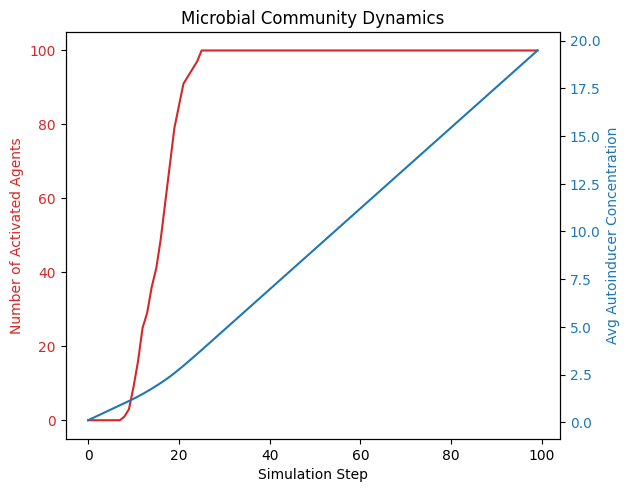

In [18]:
def simulate_microbial_community(steps=100, community_size=100):
    microbial_community = [MicrobialAgent(position=np.random.rand(2) * 10) for _ in range(community_size)]
    activated_counts = []
    total_concentrations = []

    for step in range(steps):
        # Reset total concentration for each step to simulate degradation
        total_concentration = sum(microbe.autoinducer_concentration for microbe in microbial_community)
        
        for microbe in microbial_community:
            microbe.produce_autoinducers()
        
        activated_count = 0
        for microbe in microbial_community:
            quorum_sensing = microbe.sense_environment(microbial_community)
            microbe.act(quorum_sensing)
            if microbe.activated:
                activated_count += 1

        # Calculate total concentration after all actions
        total_concentration = sum(microbe.autoinducer_concentration for microbe in microbial_community)
        activated_counts.append(activated_count)
        total_concentrations.append(total_concentration / community_size)

    
   # Plotting
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Simulation Step')
    ax1.set_ylabel('Number of Activated Agents', color=color)
    ax1.plot(activated_counts, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Avg Autoinducer Concentration', color=color)  # We already handled the x-label with ax1
    ax2.plot(total_concentrations, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # Otherwise, the right y-label might be slightly clipped.
    plt.title('Microbial Community Dynamics')
    plt.show()

simulate_microbial_community()

## position tracking

In [19]:
class MicrobialAgent:
    def __init__(self, position):
        self.position = np.array(position)
        # Introduce more variability in production rates and thresholds
        self.autoinducer_production = np.random.uniform(0.01, 0.2)
        self.autoinducer_threshold = np.random.uniform(1.0, 3.0)  # Higher and more varied thresholds
        self.autoinducer_concentration = 0
        self.activated = False

        # History tracking
        self.history = {'position': [self.position.copy()], 'activated': [self.activated]}
    
    def update_history(self):
        self.history['position'].append(self.position.copy())
        self.history['activated'].append(self.activated)
        
    def produce_autoinducers(self):
        self.autoinducer_concentration += self.autoinducer_production

    def distance_to(self, other_agent):
        return np.linalg.norm(self.position - other_agent.position)

    def sense_environment(self, microbial_community):
        # Only consider agents within a certain radius for a more localized sensing
        sensed_concentration = sum(
            microbe.autoinducer_concentration for microbe in microbial_community if self.distance_to(microbe) < 2.0
        ) / len([microbe for microbe in microbial_community if self.distance_to(microbe) < 2.0])
        return sensed_concentration >= self.autoinducer_threshold

    def act(self, quorum_sensing):
        if quorum_sensing and not self.activated:
            # More noticeable change upon activation
            self.autoinducer_production += 0.1
            self.activated = True


In [25]:
def simulate_microbial_community(steps=100, community_size=100):
    microbial_community = [MicrobialAgent(position=np.random.rand(2) * 10) for _ in range(community_size)]
    activated_counts = []
    total_concentrations = []

    for step in range(steps):
        # Reset total concentration for each step to simulate degradation
        total_concentration = sum(microbe.autoinducer_concentration for microbe in microbial_community)
        
        for microbe in microbial_community:
            microbe.produce_autoinducers()
        
        activated_count = 0
        for microbe in microbial_community:
            quorum_sensing = microbe.sense_environment(microbial_community)
            microbe.act(quorum_sensing)
            if microbe.activated:
                activated_count += 1

        # Calculate total concentration after all actions
        total_concentration = sum(microbe.autoinducer_concentration for microbe in microbial_community)
        activated_counts.append(activated_count)
        total_concentrations.append(total_concentration / community_size)

        # Update history at the end of each step
        for microbe in microbial_community:
            microbe.update_history()
            
    return microbial_community

In [33]:
import io
import base64
import numpy as np
import imageio
from IPython.display import HTML
import matplotlib.pyplot as plt

def create_gif(microbial_community, steps=100, filename="simulation.gif"):
    images = []
    for step in range(steps):
        fig, ax = plt.subplots()
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 10)
        for microbe in microbial_community:
            pos = microbe.history['position'][step]
            if microbe.history['activated'][step]:
                ax.plot(pos[0], pos[1], 'ro')  # Red for activated
            else:
                ax.plot(pos[0], pos[1], 'bo')  # Blue for not activated
        # Save the current figure to a temporary buffer
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=120)
        buf.seek(0)
        images.append(imageio.imread(buf))
        buf.close()
        plt.close(fig)
    
    # Create and save the GIF with loop=0 for infinite loop
    imageio.mimsave(filename, images, duration=0.1, loop=0)

    # Display the GIF in a Jupyter notebook
    with open(filename, 'rb') as file:
        data = file.read()
        data_url = 'data:image/gif;base64,' + base64.b64encode(data).decode()
    display(HTML(f'<img src="{data_url}" alt="Microbial Simulation" style="max-width:100%;"/>'))

def plot_microbial_community_dynamics(community):
    """
    Plots the dynamics of the microbial community simulation using the community output,
    including the number of activated agents and the average autoinducer concentration over time.

    Parameters:
    - community: A list of MicrobialAgent objects after running the simulation.
    """
    steps = len(community[0].history['activated'])  # Assuming all agents have the same length of history
    activated_counts = []
    total_concentrations = []

    # Aggregate data over steps
    for step in range(steps):
        activated_count = sum(agent.history['activated'][step] for agent in community)
        total_concentration = sum(agent.history['position'][step] for agent in community) / len(community)
        activated_counts.append(activated_count)
        total_concentrations.append(total_concentration)

    # Plotting setup
    fig, ax1 = plt.subplots()

    # Plot for the number of activated agents
    color = 'tab:red'
    ax1.set_xlabel('Simulation Step')
    ax1.set_ylabel('Number of Activated Agents', color=color)
    ax1.plot(activated_counts, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Plot for the average autoinducer concentration
    ax2 = ax1.twinx()  # Creates a second y-axis sharing the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Avg Autoinducer Concentration', color=color)
    ax2.plot(total_concentrations, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # Adjust layout to prevent overlap and clipping
    plt.title('Microbial Community Dynamics')
    plt.show()


/var/folders/vy/vr0_ytms6m95qrnk7xnh0bth0000gq/T/ipykernel_36458/3259621536.py:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(buf))



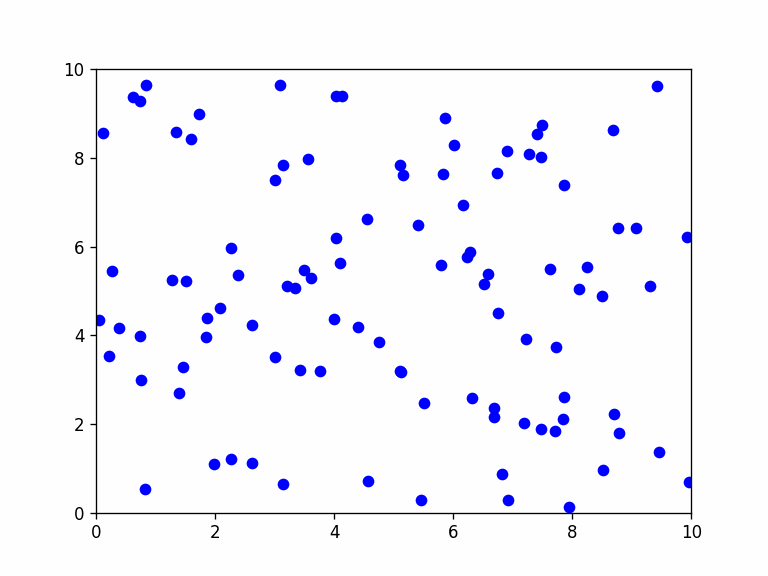

In [29]:
# Run the simulation
community = simulate_microbial_community(steps=100, community_size=100)

# Create the animation
create_gif(community, steps=100, filename="microbial_simulation.gif")

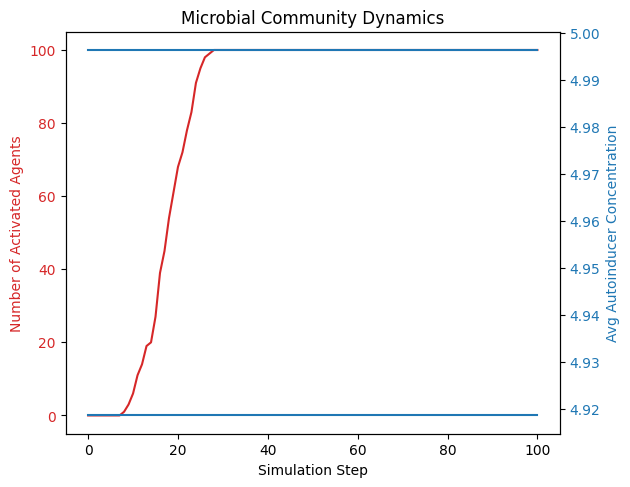

In [34]:
plot_microbial_community_dynamics(community)

In [30]:
microbial_community[0].history

{'position': [array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array([6.11606163, 4.22523099]),
  array(